In [1]:
import reXplan as rx
import pandas as pd
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter("ignore") # warning are ignored for now

In [2]:
simulationName = 'strata_example'
network = rx.network.Network(simulationName)
simulation = rx.simulation.Sim(simulationName)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                        

start= 1, stop= 41
start= 12, stop= 17


In [3]:
ref_return_period = 'rp6'
out_db = simulation.initialize_model_rp(network=network,
                               ref_return_period=ref_return_period,
                               iterationNumber=1,
                               maxTotalIteration=50,
                               cv=0.1,
                               #x_min=0.5,
                               #x_max=2
                                )

x_min = 0.29
x_max = 3.06

Strata  3
Sample size  10
Strata  4
Sample size  8
-----------------
 Kmeans solution 
-----------------
 *** Domain:  1  ***
 Number of strata:  4
 Sample size     :  8
Computations are being done on population data

Number of strata:  4
... of which with only one unit:  0
Input data have been checked and are compliant with requirements

 *** Domain :  1   1
 Number of strata :  10000
 *** Sample cost:  7.712792
 *** Number of strata:  3
 *** Sample size :  7
 *** Number of strata :  3
---------------------------
Strata = 0
Number of samples = 2.0
Intensity samples between 0.2912113144691211 and 0.510799841369382

Strata = 1
Number of samples = 2.0
Intensity samples between 0.5108621443169865 and 0.8590661690137702

Strata = 2
Number of samples = 3.0
Intensity samples between 0.8592662326967229 and 3.0595502986365934


In [4]:
#
df=simulation.run(network, iterationSet = [4,5], time = None, run_type = 'ac_opf', delta = 1e-16, saveOutput = False)
#df[0][0].xs('TR1', level='id', axis=1, drop_level=True)
df

Strata = 2; Iteration = 4


 30%|███       | 12/40 [00:04<00:09,  2.81it/s]Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
CalculationNotConverged at time step 12
 38%|███▊      | 15/40 [00:05<00:09,  2.56it/s]Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
Multiple connected slacks in one ar

Strata = 2; Iteration = 5


 30%|███       | 12/40 [00:03<00:09,  2.91it/s]Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
Multiple connected slacks in one area found. This would probably lead to non-convergence of the OPF. Therefore, all but one slack (ext_grid) were changed to gens. To avoid undesired behaviour, rather convert the slacks to gens yourself and set slack=True for only one of them.
100%|██████████| 40/40 [00:15<00:00,  2.63it/s]


In [5]:
simulation.stratResults

,Domain,Stratum,Population,Allocation,SamplingRate,Lower_X1,Upper_X1
1,1.0,1,5208.0,2.0,0.000460,0.291211,0.510800
2,1.0,2,3300.0,2.0,0.000716,0.510862,0.859066
3,1.0,3,1492.0,3.0,0.001979,0.859266,3.059550


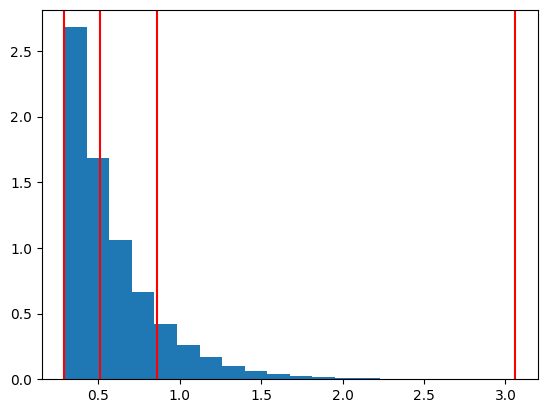

In [6]:
plt.hist(simulation.samples, density=True, bins=20)
for b in np.append(simulation.stratResults["Upper_X1"].values, simulation.stratResults["Lower_X1"].values[0]):
    plt.axvline(x = b, color = 'r')

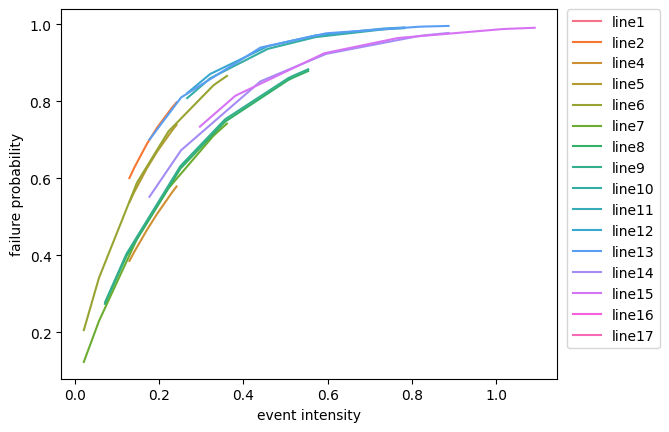

In [7]:
df = simulation.failureProbs[simulation.failureProbs['element type']=='Line']
sns.lineplot(data=df, x='event intensity', y='failure probability', hue='power element')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

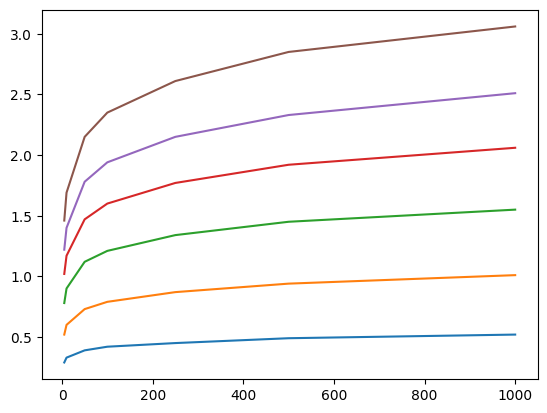

In [8]:
for rp in network.returnPeriods.keys():
    sns.lineplot(x=network.returnPeriods[rp].x_data, y=network.returnPeriods[rp].y_data)

<AxesSubplot: >

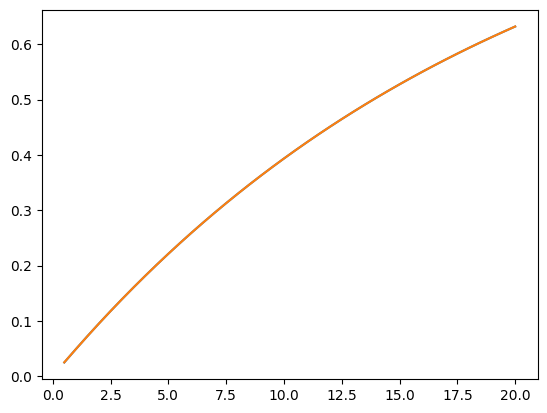

In [9]:
fc = 'towers_1'
rp = 'rp6'

x = network.fragilityCurves[fc].x_data

sns.lineplot(x=x, y=network.fragilityCurves[fc].y_data)
sns.lineplot(x=x, y=network.fragilityCurves[fc].projected_fc(rp=network.returnPeriods[rp], ref_rp=network.returnPeriods[ref_return_period], xnew=x))

In [10]:
simulation.failureProbs[(simulation.failureProbs['element type']=='Generator') & (simulation.failureProbs['iteration']==4)]

,iteration,strata,event intensity,element type,power element,failure probability,status
163,4,1,0.170998,Generator,g0,0.019750,NaN
164,4,1,0.170998,Generator,g1,0.025431,NaN
165,4,1,0.591572,Generator,g7,NaN,NaN
166,4,1,0.591572,Generator,g18,0.057971,NaN
167,4,1,0.591572,Generator,g11,0.072076,NaN
168,4,1,0.591572,Generator,g16,NaN,NaN
